# 1) Mengumpulkan Data



*   Kebutuhan Data
*   Mengambil Data

Data diambil di web uci dengan link https://archive.ics.uci.edu/ml/datasets/Hepatitis

1. Title: Hepatitis Domain

2. Sources:
     (a) unknown
     (b) Donor: G.Gong  (Carnegie-Mellon University) via 
                   Bojan Cestnik
                   Jozef Stefan Institute
                   Jamova 39
                   61000 Ljubljana
                   Yugoslavia (tel.: (38)(+61) 214-399 ext.287) }
     (c) Date: November, 1988

3. Past Usage:
    1. Diaconis,P. & Efron,B. (1983).  Computer-Intensive Methods in 
       Statistics.  Scientific American, Volume 248.
       -- Gail Gong reported a 80% classfication accuracy
    2. Cestnik,G., Konenenko,I, & Bratko,I. (1987). Assistant-86: A
       Knowledge-Elicitation Tool for Sophisticated Users.  In I.Bratko
       & N.Lavrac (Eds.) Progress in Machine Learning, 31-45, Sigma Press.
       -- Assistant-86: 83% accuracy

4. Relevant Information:
    Please ask Gail Gong for further information on this database.

5. Number of Instances: 155

6. Number of Attributes: 20 (including the class attribute)

7. Attribute information: 
     1. Class: DIE, LIVE
     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
     3. SEX: male, female
     4. STEROID: no, yes
     5. ANTIVIRALS: no, yes
     6. FATIGUE: no, yes
     7. MALAISE: no, yes
     8. ANOREXIA: no, yes
     9. LIVER BIG: no, yes
    10. LIVER FIRM: no, yes
    11. SPLEEN PALPABLE: no, yes
    12. SPIDERS: no, yes
    13. ASCITES: no, yes
    14. VARICES: no, yes
    15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
        -- see the note below
    16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
    17. SGOT: 13, 100, 200, 300, 400, 500, 
    18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
    19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
    20. HISTOLOGY: no, yes

    The BILIRUBIN attribute appears to be continuously-valued.  I checked
    this with the donater, Bojan Cestnik, who replied:

      About the hepatitis database and BILIRUBIN problem I would like to say
      the following: BILIRUBIN is continuous attribute (= the number of it's
      "values" in the ASDOHEPA.DAT file is negative!!!); "values" are quoted
      because when speaking about the continuous attribute there is no such 
      thing as all possible values. However, they represent so called
      "boundary" values; according to these "boundary" values the attribute
      can be discretized. At the same time, because of the continious
      attribute, one can perform some other test since the continuous
      information is preserved. I hope that these lines have at least roughly 
      answered your question. 

8. Missing Attribute Values: (indicated by "?")
     Attribute Number:    Number of Missing Values:
        1:    0
        2:    0
        3:    0
        4:    1
        5:    0
        6:    1
        7:    1
        8:    1
        9:    10
        10:    11
        11:    5
        12:    5
        13:    5
        14:    5
        15:    6
        16:    29
        17:    4
        18:    16
        19:    67
        20:    0

9. Class Distribution:
     DIE: 32
    LIVE: 123




In [1]:
# Load Library yang diperlukan

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
# Load Dataset

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data'
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [3]:
# Memberi nama header atribut atau fitur (karena fitur tidak terlihat maka perlu kita beri nama terlebih dahulu)

df.columns = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES',
              'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']

In [4]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


# 2) Menelaah Data


*   Menganalisis tipe dan relasi data
*   Menganalisis karakteristik data
*   Membuat laporan telaah data





In [5]:
# Menganalisa tipe dan relasi data

# Melihat tipe dataset
type(df)

pandas.core.frame.DataFrame

In [6]:
# Melihat ukuran dataset
print(df.shape)

(155, 20)


In [7]:
# Melihat informasi tipe data semua kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   AGE              155 non-null    int64 
 2   SEX              155 non-null    int64 
 3   STEROID          155 non-null    object
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          155 non-null    object
 6   MALAISE          155 non-null    object
 7   ANOREXIA         155 non-null    object
 8   LIVER BIG        155 non-null    object
 9   LIVER FIRM       155 non-null    object
 10  SPLEEN PALPABLE  155 non-null    object
 11  SPIDERS          155 non-null    object
 12  ASCITES          155 non-null    object
 13  VARICES          155 non-null    object
 14  BILIRUBIN        155 non-null    object
 15  ALK PHOSPHATE    155 non-null    object
 16  SGOT             155 non-null    object
 17  ALBUMIN          155 non-null    ob

In [8]:
# Melihat distribusi Class (apa saja jenisnya)
df['Class'].unique()

array([2, 1])

In [9]:
# Melihat distribusi Class (jumlahnya tiap Class)
df['Class'].value_counts()

2    123
1     32
Name: Class, dtype: int64

Text(0.5, 1.02, 'Distribusi Penderita Penyakit Kanker Paru-Paru')

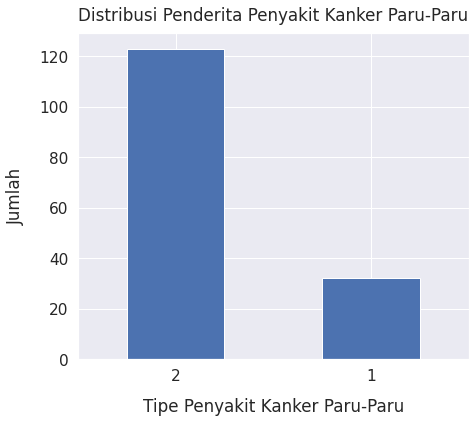

In [10]:
# Melihat distribusi kelas (visualisasi diagram batang dengan library seaborn)

sns.set(font_scale=1.4)
df['Class'].value_counts().plot(kind='bar', figsize=(7,6), rot=0)
plt.xlabel("Tipe Penyakit Kanker Paru-Paru", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Penderita Penyakit Kanker Paru-Paru", y=1.02)

In [11]:
# Melihat deskripsi dataset
df.describe()

,Class,AGE,SEX,ANTIVIRALS,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


## Laporan atau Kesimpulan

*   Tipe Dataset adalah dataframe
*   Data Tidak Seimbang
*   Ada beberapa fitur yang seharusnya bertipe data 
int64, namun tertulis Object, sehingga pada deskripsi data tidak muncul karena fungsi describe() mengembalikan nilai numerik.
*   Jumlah data adalah 155 baris dan 20 kolom.
*   terdapat data yang hilang (dimana data yang hilang, diberikan tanda '?').
*   Jumlah distribusi class 1/(DIE) => ada 32 pasien, Class 2/(LIVE) => ada 123 pasien.

# 3) Memvalidasi Data



*   melakukan pengecekan kelengkapan data
*   membuat rekomendasi kelengkapan data
*   mengembangkan perencanaan untuk mendukung strategi pencegahan kerusakan



In [12]:
# Cek dataframe yang missing yang ditandai dengan tanda "?"
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [13]:
# Merubah nilai "?" menjadi "NaN" dengan library numpy.nan
df.replace("?", np.nan, inplace=True)

In [14]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1


In [15]:
# Mengecek apakah dataframe ada nilai kosong atau "NaN"
df.isnull().values.any()

True

In [16]:
# Melihat lokasi pada kolom dataframe yang kosong atau "NaN"
df.loc[:, df.isnull().any()].columns

Index(['STEROID', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM',
       'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN',
       'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME'],
      dtype='object')

In [17]:
# Melihat prosentasi dari nilai kosong (NaN) untuk steroid, fatigue, malaise, anorexia, liver big, liver firm, spleen palpable, spiders, ascities, varices, bilirubin, alk phospate, sgot, albumin, protime
df.loc[:,list(df.loc[:,df.isnull().any()].columns)].isnull().sum()

STEROID             1
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
dtype: int64

In [18]:
# melihat data missing value dalam bentuk dataframe
df[['STEROID', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM',
       'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN',
       'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']]

,STEROID,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME
0,1,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN
1,1,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN
2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN
3,NaN,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80
4,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2,1,1,1,2,2,2,1,1,1,7.60,NaN,242,3.3,50
151,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,NaN
152,1,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,NaN
153,1,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48


In [19]:
# Mengecek apakah dataframe ada yang duplicate atau tidak
cek_duplicate = df.duplicated().value_counts()
print(cek_duplicate)

False    155
dtype: int64


### Kesimpulan

*   Dataset yang ditandai tanda "?" diubah menjadi NaN dengan fungsi replace
*   Daftar kolom yang memiliki nilai NaN yaitu 
      - STEROID berjumlah 1
      - FATIGUE berjumlah 1
      - MALAISE berjumlah 1
      - ANOREXIA berjumlah 1
      - LIVER BIG berjumlah 10
      - LIVER FIRM berjumlah 11
      - SPLEEN PALPABLE berjumlah 5
      - SPIDERS berjumlah 5
      - ASCITES berjumlah 5
      - VARICES berjumlah 5
      - BILIRUBIN berjumlah 6
      - ALK PHOSPHATE berjumlah 29
      - SGOT berjumlah 4
      - ALBUMIN berjumlah 16
      - PROTIME berjumlah 67



*   Tidak ada data duplicate





# 4) Menentukan Objek Data

semua kolom dan baris akan digunakan pada pada pembuatan model 

# 5) Membersihkan Data

1. Memperbaiki nilai yang hilang dengan menggunakan median

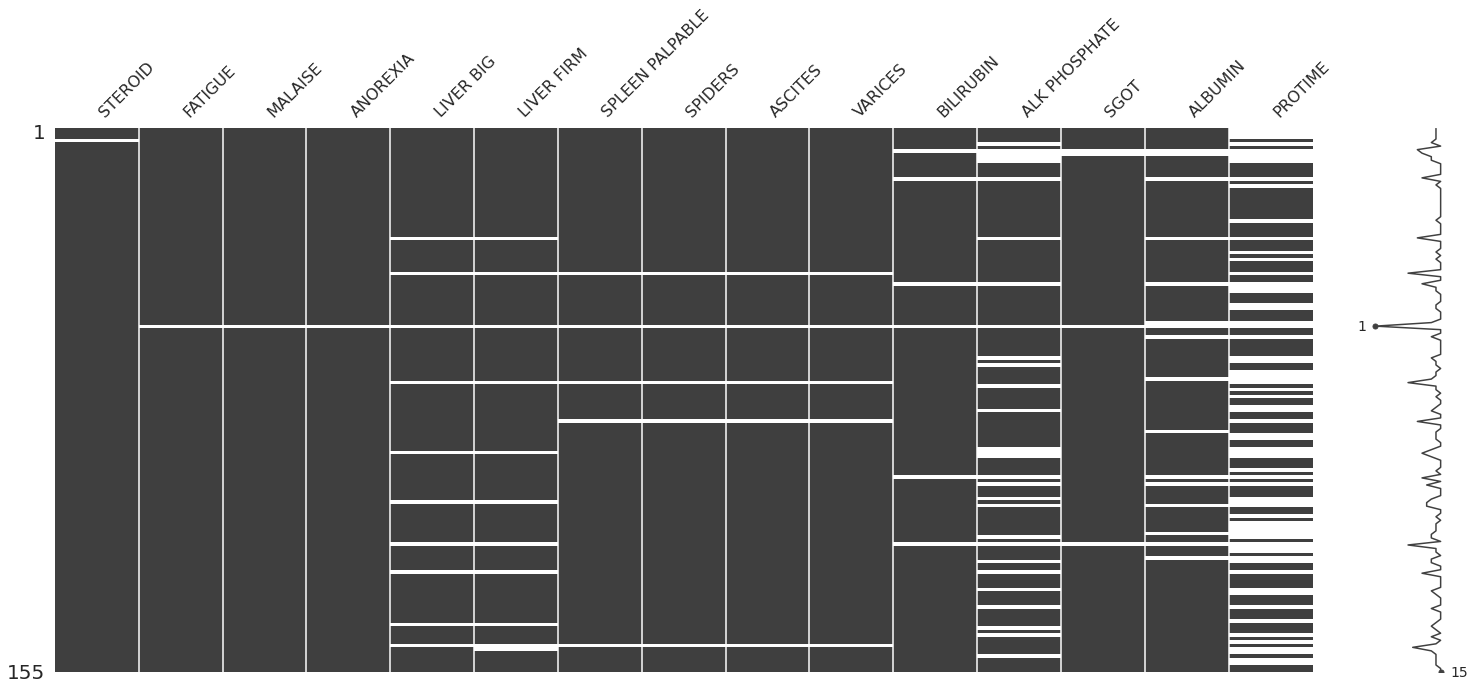

In [20]:
# Memperbaiki nilai yang hilang
# Visualisasi data nilai yang hilang
missingdata_df = df.columns[df.isnull().any()].tolist()
missingno.matrix(df[missingdata_df])

In [21]:
# Memperbaiki nilai yang hilang dengan nilai tengah (median) => fillna : untuk mengisi nilai yang kosong
median_steroid = df['STEROID'].median()
df['STEROID']=df['STEROID'].fillna(median_steroid)

median_fatigue = df['FATIGUE'].median()
df['FATIGUE']=df['FATIGUE'].fillna(median_fatigue)

median_malaise = df['MALAISE'].median()
df['MALAISE']=df['MALAISE'].fillna(median_malaise)

median_anorexia = df['ANOREXIA'].median()
df['ANOREXIA']=df['ANOREXIA'].fillna(median_anorexia)

median_liverbig = df['LIVER BIG'].median()
df['LIVER BIG']=df['LIVER BIG'].fillna(median_liverbig)

median_liverfirm = df['LIVER FIRM'].median()
df['LIVER FIRM']=df['LIVER FIRM'].fillna(median_liverfirm)

median_spleen = df['SPLEEN PALPABLE'].median()
df['SPLEEN PALPABLE']=df['SPLEEN PALPABLE'].fillna(median_spleen)

median_spiders = df['SPIDERS'].median()
df['SPIDERS']=df['SPIDERS'].fillna(median_spiders)

median_ascites = df['ASCITES'].median()
df['ASCITES']=df['ASCITES'].fillna(median_ascites)

median_varices = df['VARICES'].median()
df['VARICES']=df['VARICES'].fillna(median_varices)

median_bilirubin = df['BILIRUBIN'].median()
df['BILIRUBIN']=df['BILIRUBIN'].fillna(median_bilirubin)

median_alk = df['ALK PHOSPHATE'].median()
df['ALK PHOSPHATE']=df['ALK PHOSPHATE'].fillna(median_alk)

median_sgot = df['SGOT'].median()
df['SGOT']=df['SGOT'].fillna(median_sgot)

median_albumin = df['ALBUMIN'].median()
df['ALBUMIN']=df['ALBUMIN'].fillna(median_albumin)

median_protime = df['PROTIME'].median()
df['PROTIME']=df['PROTIME'].fillna(median_protime)

In [22]:
# Melihat kembali nilai kosong (NaN) kosong setelah diisi menggunakan nilai median
df.isnull().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

Dataset sudah bersih

In [23]:
# Menghapus fitur yang bernilai konstant
df = df.loc[:, df.apply(pd.Series.nunique) !=1]
df.shape

(155, 20)

# 6) Mengkontruksi Data

terdiri dari :
*   Representasi fitur dan merubah tipenya.
*   Membagi data menjadi training dan testing.
*   Membandingkan Data Original, Data Normalisasi, Data Original PCA, Data Normalisasi PCA

In [24]:
# Mengecek Representasi Fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   AGE              155 non-null    int64 
 2   SEX              155 non-null    int64 
 3   STEROID          155 non-null    object
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          155 non-null    object
 6   MALAISE          155 non-null    object
 7   ANOREXIA         155 non-null    object
 8   LIVER BIG        155 non-null    object
 9   LIVER FIRM       155 non-null    object
 10  SPLEEN PALPABLE  155 non-null    object
 11  SPIDERS          155 non-null    object
 12  ASCITES          155 non-null    object
 13  VARICES          155 non-null    object
 14  BILIRUBIN        155 non-null    object
 15  ALK PHOSPHATE    155 non-null    object
 16  SGOT             155 non-null    object
 17  ALBUMIN          155 non-null    ob

In [25]:
# Mengubah yang tipe Object menjadi int64
df["STEROID"] = df["STEROID"].astype('int64')
df["FATIGUE"] = df["FATIGUE"].astype('int64')
df["MALAISE"] = df["MALAISE"].astype('int64')
df["ANOREXIA"] = df["ANOREXIA"].astype('int64')
df["LIVER BIG"] = df["LIVER BIG"].astype('int64')
df["LIVER FIRM"] = df["LIVER FIRM"].astype('int64')
df["SPLEEN PALPABLE"] = df["SPLEEN PALPABLE"].astype('int64')
df["SPIDERS"] = df["SPIDERS"].astype('int64')
df["ASCITES"] = df["ASCITES"].astype('int64')
df["VARICES"] = df["VARICES"].astype('int64')
df["BILIRUBIN"] = df["BILIRUBIN"].astype('float')
df["ALK PHOSPHATE"] = df["ALK PHOSPHATE"].astype('int64')
df["SGOT"] = df["SGOT"].astype('int64')
df["ALBUMIN"] = df["ALBUMIN"].astype('float')
df["PROTIME"] = df["PROTIME"].astype('int64')

In [26]:
# melihat kembali data yang sudah diganti tipe datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   AGE              155 non-null    int64  
 2   SEX              155 non-null    int64  
 3   STEROID          155 non-null    int64  
 4   ANTIVIRALS       155 non-null    int64  
 5   FATIGUE          155 non-null    int64  
 6   MALAISE          155 non-null    int64  
 7   ANOREXIA         155 non-null    int64  
 8   LIVER BIG        155 non-null    int64  
 9   LIVER FIRM       155 non-null    int64  
 10  SPLEEN PALPABLE  155 non-null    int64  
 11  SPIDERS          155 non-null    int64  
 12  ASCITES          155 non-null    int64  
 13  VARICES          155 non-null    int64  
 14  BILIRUBIN        155 non-null    float64
 15  ALK PHOSPHATE    155 non-null    int64  
 16  SGOT             155 non-null    int64  
 17  ALBUMIN         

In [27]:
# Membagi Training dan Testing
X = df.iloc[:,1:57]
y = df['Class']
# Menampilkan X
X.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,200,4.0,61,1


In [28]:
# Menampilkan y
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [29]:
# menghandle imbalance data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# instantiating the random over sampler 
# ros = RandomOverSampler()
# resampling X, y
# X_ros, y_ros = ros.fit_resample(X, y)
# new class distribution 
# print(Counter(y_ros))

undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_rus, y_rus = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_rus))

Counter({1: 32, 2: 32})


## Data Normalisasi

In [30]:
# Normalisasi menggunakan StandardScaler

X_norm = StandardScaler().fit_transform(X_rus)
# X_norm = MinMaxScaler().fit_transform(X_rus)
# Melihat hasil normalisasi dengan StandardScaler
X_norm

array([[ 0.53833541, -0.25819889, -0.93933644, ...,  0.61010798,
         0.33745166, -1.13389342],
       [-0.47500183, -0.25819889, -0.93933644, ...,  0.31203996,
        -1.08428825, -1.13389342],
       [ 1.46722788, -0.25819889, -0.93933644, ...,  0.61010798,
         0.33745166, -1.13389342],
       ...,
       [ 0.53833541, -0.25819889, -0.93933644, ...,  1.50431203,
        -0.27186544, -1.13389342],
       [-1.15055999, -0.25819889,  1.06458129, ...,  0.61010798,
         1.62378777, -1.13389342],
       [-0.89722568, -0.25819889, -0.93933644, ...,  0.61010798,
         0.33745166, -1.13389342]])

In [31]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y_rus, test_size=0.3, random_state=2022)

## Data Normalisasi PCA

In [32]:
pca = PCA(random_state=2022)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(norm_pca_array)
print("Heads of iris_pca:",norm_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("\n Singular Value:",sv)

Heads of iris_pca:          0         1         2         3         4         5         6   \
0 -0.016705  0.033107  1.101511  0.693178  1.703206 -0.645980 -1.577312   
1  0.020621  2.534101 -1.130841  0.227594 -2.286202  1.325905  1.525389   
2 -0.900206  0.716250  1.300475  1.620073  0.287762  0.522220  0.486531   
3 -1.626213 -1.257950  0.231672  0.261137  0.643807  0.425539 -1.122301   
4  1.981719 -1.206680  1.791695 -0.621887  0.554751  2.032700 -0.565490   

         7         8         9         10        11        12        13  \
0  0.109443  0.023365  1.191050 -0.041429 -1.318269  0.964270 -0.701659   
1  0.610874  1.865069  1.931798  0.553438 -1.415129  0.005032 -0.256127   
2 -0.774072 -0.164105  0.144703  0.803640 -0.281901 -0.668313  1.010512   
3 -1.471573  0.566311  0.197330  0.082500  0.157569  0.572349 -0.605459   
4 -0.784632 -1.829417  1.261610 -0.443682 -0.568540 -0.960739 -0.685896   

         14        15        16        17        18  
0  0.898375 -1.066122  0.

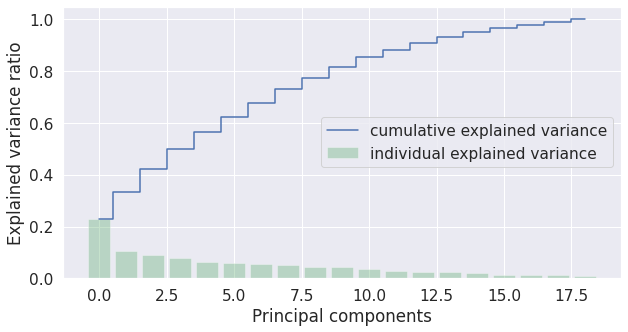

Cumulative explained ratio: [0.22871599 0.33405151 0.422409   0.50092372 0.5637475  0.62331475
 0.67884475 0.72979203 0.7740857  0.81678534 0.85328044 0.88212903
 0.90713595 0.93187154 0.95236744 0.96566159 0.97850802 0.9903247
 1.        ]


In [33]:
# Visualisasi Data Normalisasi PCA
cum_var_ratio = np.cumsum(var_ratio)
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
var_ratio,
alpha=0.3333,
align='center',
label='individual explained variance',
color = 'g')
plt.step(range(len(cum_var_ratio)),
cum_var_ratio,
where='mid',
label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()
print("Cumulative explained ratio:",cum_var_ratio)

In [34]:
# Dipilih 18 PC
pca = PCA(n_components=18, random_state=2022)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(data=norm_pca_array, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])

In [35]:
X_train_norm_pca, X_test_norm_pca, Y_train_norm_pca, Y_test_norm_pca = train_test_split(norm_pca,y_rus, test_size=0.3, random_state=2022)

# 7) Menentukan Label Data

Class 1 adalah pasien yang meninggal, Class 2 adalah pasien yang hidup

# 8) Membangun Model

*   Teknik Pemodelan yang dipakai:
    *   Menggunakan Decision Tree
    *   Parameter yang dipakai:
        *   [criterion: gini, entropy]
        *   [max_depth]
        *   [min sample split]
        *   [min sample leaf]
*   Skenario Pengujian
    * Menggunakan akurasi, presisi dan recall.
    * Pengujian menggunakan Data Original.
    * Pengujian menggunakan Data yang sudah dinormalisasi.
    * Pengujian menggunakan Data Original yang diberikan PCA.
    * Pengujian menggunakan Data yang sudah dinormalisasi dan diberikan PCA.

## Decission Tree

In [36]:
# Pemodelan Decision Tree
classifier_dt_pipeline = Pipeline([

('model',DecisionTreeClassifier()),
])

In [37]:
# menyiapkan parameter yang digunakan
parameters_dt = {

"model__max_depth": np.arange(1,21),
"model__min_samples_leaf": np.arange(1,101,2),
"model__min_samples_split": np.arange(2,11),
"model__criterion": ['gini','entropy'],
"model__random_state": [2022]

}

## Pemodelan Decision Tree dengan Data Normalisasi tapi diberikan PCA

In [38]:
norm_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [39]:
norm_pca_classifier_dt.fit(X_train_norm_pca,Y_train_norm_pca.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [40]:
norm_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=3,
                                        random_state=2022))])

In [41]:
for param_name in sorted(parameters_dt.keys()):
  print('%s: %r' %(param_name,norm_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 3
model__min_samples_leaf: 3
model__min_samples_split: 2
model__random_state: 2022


## Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(X_train_norm_pca, Y_train_norm_pca)


## KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_norm_pca, Y_train_norm_pca)

KNeighborsClassifier()

# 9) Mengevaluasi Pemodelan

In [44]:
norm_pca_y_pred_dt_train = norm_pca_classifier_dt.predict(X_train_norm_pca)
norm_pca_accuracy_dt_train = accuracy_score(Y_train_norm_pca,norm_pca_y_pred_dt_train)
print('Akurasi pada training set: ', norm_pca_accuracy_dt_train)
norm_pca_precision_dt_train = precision_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_pca_precision_dt_train)
norm_pca_recall_dt_train = recall_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_pca_recall_dt_train)
norm_pca_y_pred_dt_test = norm_pca_classifier_dt.predict(X_test_norm_pca)
norm_pca_accuracy_dt_test = accuracy_score(Y_test_norm_pca,norm_pca_y_pred_dt_test)
print('Akurasi pada test set: ', norm_pca_accuracy_dt_test)
norm_pca_precision_dt_test = precision_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_pca_precision_dt_test)
norm_pca_recall_dt_test = recall_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_pca_recall_dt_test)

Akurasi pada training set:  0.9318181818181818
Precision pada training set:  0.9318181818181818
Recall pada training set:  0.9318181818181818
Akurasi pada test set:  0.75
Precision pada test set:  0.75
Recall pada test set:  0.75


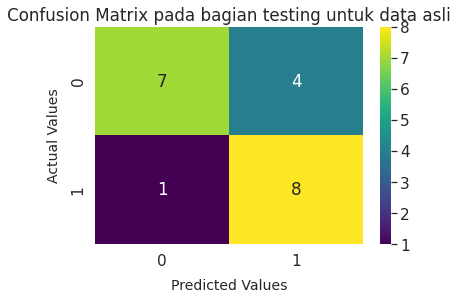

In [45]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test_norm_pca,norm_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

In [46]:
norm_pca_y_pred_nb_train = nbtrain.predict(X_train_norm_pca)
norm_pca_accuracy_nb_train = accuracy_score(Y_train_norm_pca,norm_pca_y_pred_nb_train)
print('Akurasi pada training set: ', norm_pca_accuracy_nb_train)
norm_pca_precision_nb_train = precision_score(Y_train_norm_pca,norm_pca_y_pred_nb_train, average='micro')
print('Precision pada training set: ', norm_pca_precision_nb_train)
norm_pca_recall_nb_train = recall_score(Y_train_norm_pca,norm_pca_y_pred_nb_train, average='micro')
print('Recall pada training set: ', norm_pca_recall_nb_train)
norm_pca_y_pred_nb_test = nbtrain.predict(X_test_norm_pca)
norm_pca_accuracy_nb_test = accuracy_score(Y_test_norm_pca,norm_pca_y_pred_nb_test)
print('Akurasi pada test set: ', norm_pca_accuracy_nb_test)
norm_pca_precision_nb_test = precision_score(Y_test_norm_pca,norm_pca_y_pred_nb_test, average='micro')
print('Precision pada test set: ', norm_pca_precision_nb_test)
norm_pca_recall_nb_test = recall_score(Y_test_norm_pca,norm_pca_y_pred_nb_test, average='micro')
print('Recall pada test set: ', norm_pca_recall_nb_test)

Akurasi pada training set:  0.9318181818181818
Precision pada training set:  0.9318181818181818
Recall pada training set:  0.9318181818181818
Akurasi pada test set:  0.7
Precision pada test set:  0.7
Recall pada test set:  0.7


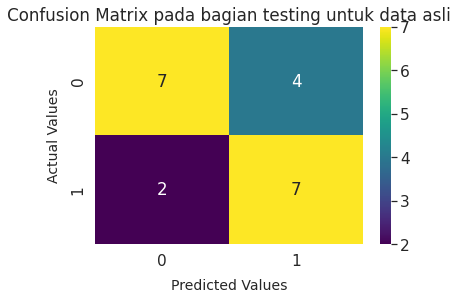

In [47]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test_norm_pca,norm_pca_y_pred_nb_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

In [48]:
norm_pca_y_pred_knn_train = knn.predict(X_train_norm_pca)
norm_pca_accuracy_knn_train = accuracy_score(Y_train_norm_pca,norm_pca_y_pred_knn_train)
print('Akurasi pada training set: ', norm_pca_accuracy_knn_train)
norm_pca_precision_knn_train = precision_score(Y_train_norm_pca,norm_pca_y_pred_knn_train, average='micro')
print('Precision pada training set: ', norm_pca_precision_nb_train)
norm_pca_recall_knn_train = recall_score(Y_train_norm_pca,norm_pca_y_pred_knn_train, average='micro')
print('Recall pada training set: ', norm_pca_recall_nb_train)
norm_pca_y_pred_knn_test = knn.predict(X_test_norm_pca)
norm_pca_accuracy_knn_test = accuracy_score(Y_test_norm_pca,norm_pca_y_pred_knn_test)
print('Akurasi pada test set: ', norm_pca_accuracy_knn_test)
norm_pca_precision_knn_test = precision_score(Y_test_norm_pca,norm_pca_y_pred_knn_test, average='micro')
print('Precision pada test set: ', norm_pca_precision_knn_test)
norm_pca_recall_knn_test = recall_score(Y_test_norm_pca,norm_pca_y_pred_knn_test, average='micro')
print('Recall pada test set: ', norm_pca_recall_knn_test)

Akurasi pada training set:  0.8863636363636364
Precision pada training set:  0.9318181818181818
Recall pada training set:  0.9318181818181818
Akurasi pada test set:  0.85
Precision pada test set:  0.85
Recall pada test set:  0.85


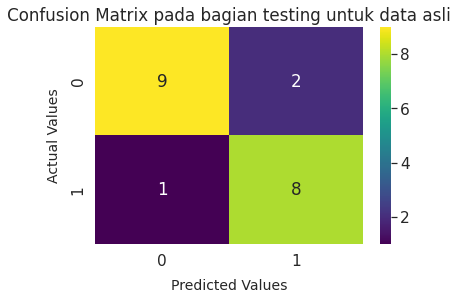

In [49]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test_norm_pca,norm_pca_y_pred_knn_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

In [50]:
models = [
('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_train, norm_pca_accuracy_dt_test),
('Gaussian Naive Bayes PCA Data Normalisasi', norm_pca_accuracy_nb_train, norm_pca_accuracy_nb_test),
('K-Nearest Neighbors PCA Data Normalisasi', norm_pca_accuracy_knn_train, norm_pca_accuracy_knn_test),
]

In [51]:
# Melakukan perbandingan hasil training akurasi dan test akurasi dengan 3 model
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Decision Tree PCA Data Normalisasi,0.931818,0.75
1,Gaussian Naive Bayes PCA Data Normalisasi,0.931818,0.70
2,K-Nearest Neighbors PCA Data Normalisasi,0.886364,0.85


In [52]:
models_comparison = [
  ('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_test, norm_pca_recall_dt_test, norm_pca_precision_dt_test),
  ('Gaussian Naive Bayes PCA Data Normalisasi', norm_pca_accuracy_nb_test, norm_pca_recall_nb_test, norm_pca_precision_nb_test),
  ('K-Nearest Neighbors PCA Data Normalisasi', norm_pca_accuracy_knn_test, norm_pca_recall_knn_test, norm_pca_precision_knn_test),
]

In [53]:
# Melakukan perbandingan hasil Akurasi, Presisi dan Recall pada data Testing dengan 2 model
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Decision Tree PCA Data Normalisasi,0.75,0.75,0.75
1,Gaussian Naive Bayes PCA Data Normalisasi,0.70,0.70,0.70
2,K-Nearest Neighbors PCA Data Normalisasi,0.85,0.85,0.85


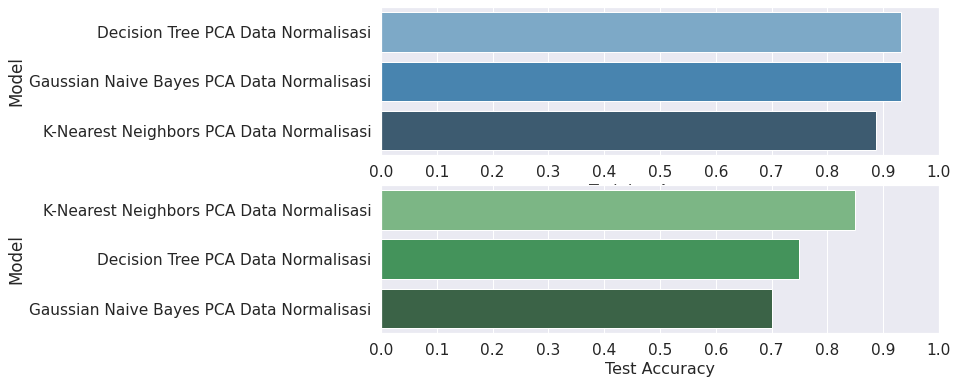

In [54]:
# Visualisasi Perbandingan 4 model dengan Seaborn
f, axes = plt.subplots(2,1, figsize=(10,6))
predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)
sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)
sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
plt.show()